In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np 
from datenbank import daten

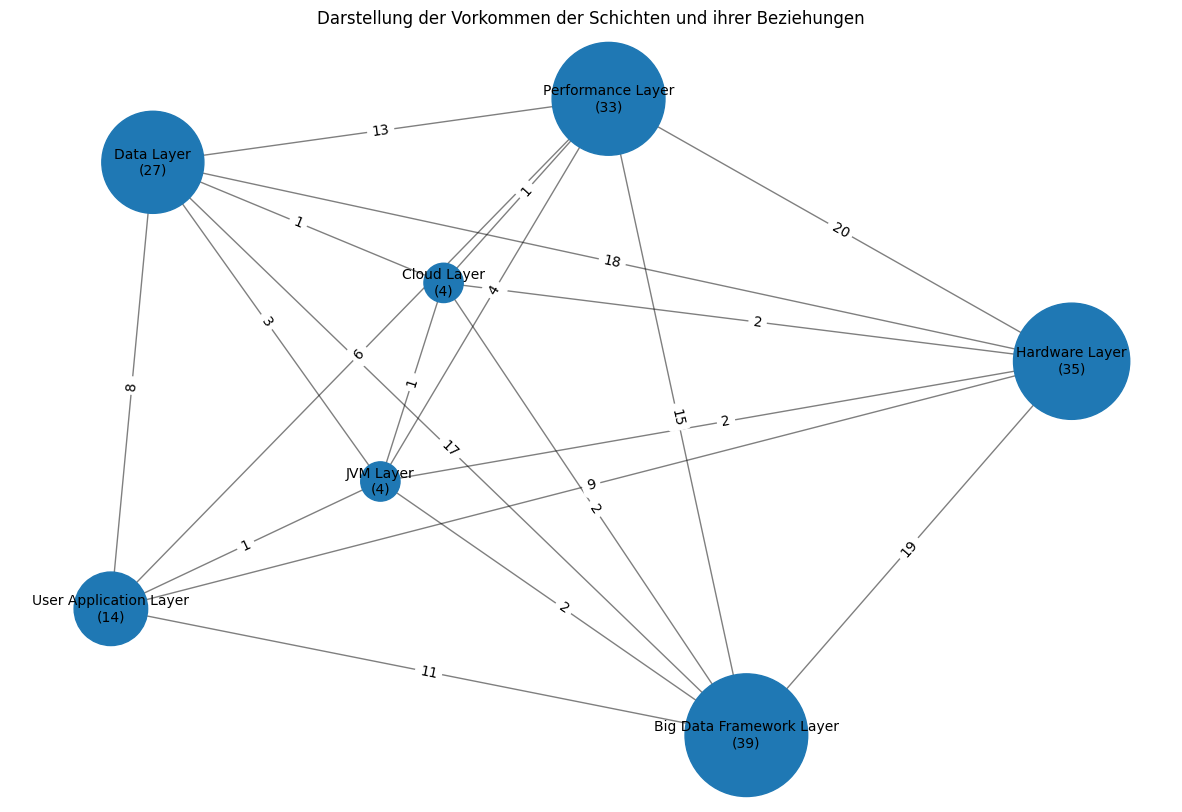

In [4]:
# Initialisieren eines ungerichteten Graphen
G_combined = nx.Graph()

# Hinzufügen jeder Kantenkombination zu G_combined mit der entsprechenden Häufigkeit
for tupel, anzahl in daten.items():
    # Erstellen aller möglichen 2-Kombinationen innerhalb jedes Tupels
    for i in range(len(tupel)):
        for j in range(i + 1, len(tupel)):
            edge = (tupel[i], tupel[j])
            if G_combined.has_edge(*edge):
                G_combined[edge[0]][edge[1]]['weight'] += anzahl
            else:
                G_combined.add_edge(*edge, weight=anzahl)

# Knotenhäufigkeit berechnen
knoten_haeufigkeit_combined = {node: 0 for node in G_combined.nodes()}
for tupel, anzahl in daten.items():
    for node in tupel:
        knoten_haeufigkeit_combined[node] += anzahl

# Knotengrößen anpassen
knoten_groessen_combined = [knoten_haeufigkeit_combined[node] * 200 for node in G_combined.nodes()]

# Graph zeichnen mit dem Kamada-Kawai-Layout
plt.figure(figsize=(15, 10))
pos_combined = nx.kamada_kawai_layout(G_combined)

nx.draw_networkx_nodes(G_combined, pos_combined, node_size=knoten_groessen_combined)
nx.draw_networkx_edges(G_combined, pos_combined, width=1.0, alpha=0.5)

# Anpassen der Knotenbeschriftungen, um die Häufigkeit einzuschließen
knoten_labels = {node: f"{node}\n({häufigkeit})" for node, häufigkeit in knoten_haeufigkeit_combined.items()}
nx.draw_networkx_labels(G_combined, pos_combined, labels=knoten_labels, font_size=10)

# Kantenbeschriftungen hinzufügen
edge_labels_combined = nx.get_edge_attributes(G_combined, 'weight')
nx.draw_networkx_edge_labels(G_combined, pos_combined, edge_labels=edge_labels_combined)

## TODO Darstellen von Blacklayer und Whitelayer Graybox layer
plt.title('Darstellung der Vorkommen der Schichten und ihrer Beziehungen')
plt.axis('off')
plt.show()
